In [2]:
import numpy as np
import matplotlib.pyplot as plt

### a)

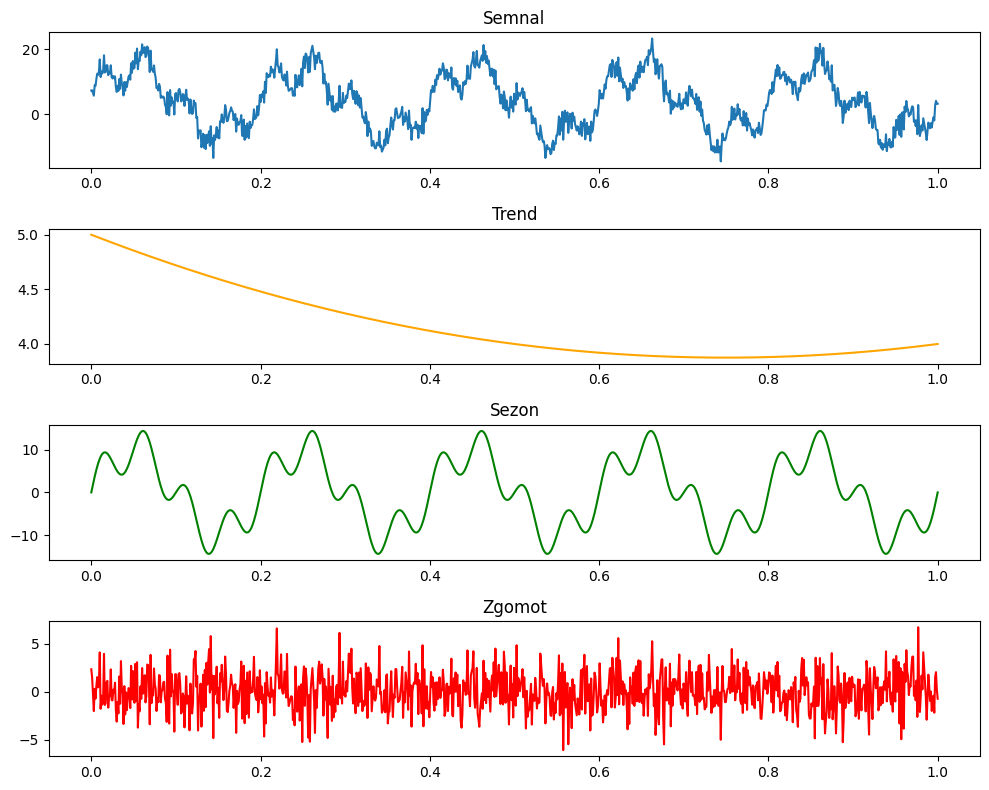

In [3]:
N = 1000
t = np.linspace(0, 1, N)

trend = 2*t**2 - 3*t + 5
sezon = 10 * np.sin(2 * np.pi * 5 * t) + 5 * np.sin(2 * np.pi * 20 * t)
noise = np.random.normal(0, 2, N)

x = trend + sezon + noise

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
axs[0].plot(t, x)
axs[0].set_title('Semnal')
axs[1].plot(t, trend, color='orange')
axs[1].set_title('Trend')
axs[2].plot(t, sezon, color='green')
axs[2].set_title('Sezon')
axs[3].plot(t, noise, color='red')
axs[3].set_title('Zgomot')
plt.tight_layout()
plt.savefig('a.pdf', format='pdf')
plt.show()

### b)

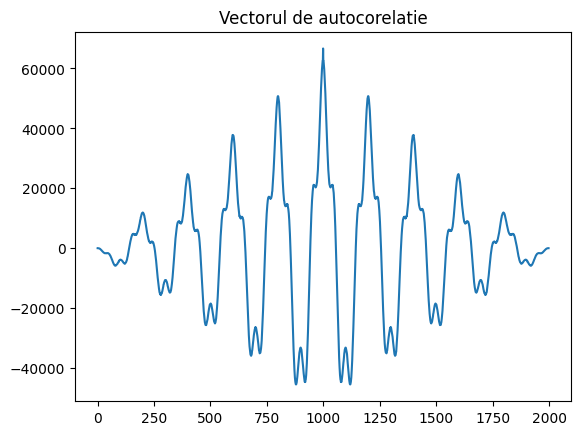

In [4]:
# vectorul de autocorelatie
x_v = x.copy()
x_v = np.array(x_v)
x_v -= np.mean(x_v)
vector_autocorelatie = np.correlate(x_v, x_v, mode='full')
plt.plot(vector_autocorelatie)
plt.title('Vectorul de autocorelatie')
plt.savefig('b.pdf', format='pdf') 

### c)

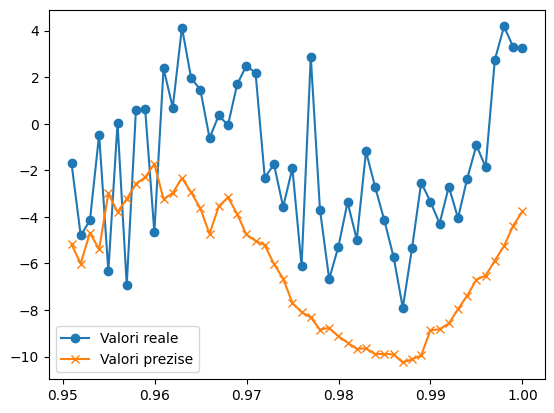

In [5]:


p = 50
x_train = x[:-p]
x_test = x[-p:]
y = x_train[p:]
m = len(y) # n-p
# matricea de regresie
Y = np.zeros((m, p))
for i in range(m):
    for j in range(p):
        Y[i, j] = x_train[i + p - j - 1]
# x*
GAMMA = Y.T@Y
gamma = Y.T@y
x_st = np.linalg.inv(GAMMA)@gamma
pred = []
history = x_train.copy()
for i in range(p):
    ultimele_p = history[-p:]
    ultimele_p = ultimele_p[::-1] # inversam ordinea
    y_pred = ultimele_p @ x_st
    pred.append(y_pred)
    history = np.append(history, y_pred)
t_pred = t[len(x_train):len(x_train)+len(pred)]
plt.plot(t_pred, x_test, label='Valori reale', marker='o')
plt.plot(t_pred, pred, label='Valori prezise', marker='x')
plt.legend()
plt.savefig('c.pdf', format='pdf')
plt.show()


### d)

In [7]:

def AR(p,m):
    x_c = x.copy()
    N = len(x_c)
    if N <= m + p:
        return None  
    x_train = x_c[:-m]  
    x_test  = x_c[-m:]   
    N_train = len(x_train)
    if N_train <= p:
        return None
    y = x_train[p:]
    m_train = len(y)
    Y = np.zeros((m_train, p))
    for i in range(m_train):
        for j in range(p):
            Y[i, j] = x_train[i + p - j - 1]
    GAMMA = Y.T @ Y
    gamma = Y.T @ y
    
    x_star = np.linalg.inv(GAMMA) @ gamma
    
    pred  = np.zeros(m)
    history = x_train.copy()
    for i in range(m):
        ultimele_p_p = history[-p:]     
        ultimele_p = ultimele_p_p[::-1]     
        y_pred = x_star @ ultimele_p
        pred[i] = y_pred
        history = np.append(history, y_pred)

    mse = np.mean((pred - x_test)**2)
    return mse
P = None # cel mai bun p
M = None
MSE = np.inf
for p in range(5,50):
    for m in range(5,100):
        mse = AR(p, m)
        if mse is None:
            continue
        if mse < MSE:
            MSE = mse
            P = p
            M = m
          
print("P optim:", P)
print("M optim:", M)

P optim: 41
M optim: 16
